In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)


### FUNCTIONS

In [2]:
#Checking the relationships between variables and saleprice 
def Scatter_plot(var,targetVariable="SalePrice"):
    data = pd.concat([df[targetVariable],df[var]],axis=1)
    data.plot.scatter(x=var,y=targetVariable)

def Box_plot(var,targetVariable="SalePrice"):
    plt.figure(figsize=(8,6))
    sns.boxplot(y=targetVariable,x=var,data=df)


def Cat_plot(var,targetVariable="SalePrice"):
    plt.figure(figsize=(8,6))
    sns.catplot(y=targetVariable,x=var,data=df)
    
"""
@params:
    df=dataframe
    targetVariable = Target variable
    numberOfColumns = number of values against targetVariable should be compared with (top k variables with highest correlation)
    largestCorrelation : true if values with largest corrleation is wanted and false otherwise
"""
def getTopCorrelationColumns(df, targetVariable, numberOfColumns, largestCorrelation):
    corrmat = df.corr()
    if largestCorrelation==True:
        return corrmat.nlargest(numberOfColumns, targetVariable)[targetVariable].index
    else:
        return corrmat.nsmallest(numberOfColumns, targetVariable)[targetVariable].index
    
"""
@param: 
    df=dataframe
    numberOfColumns = number of values against targetVariable should be compared with (top k variables with highest correlation)
    targetVariable = Target variable
@returns:
    seaborn heatmap
"""

def HeatmapWithCorrelationValues(df, targetVariable, numberOfColumns=10, largestCorrelation=True):
    cols = getTopCorrelationColumns(df,targetVariable,numberOfColumns,largestCorrelation=largestCorrelation)
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    f, ax = plt.subplots(figsize=(numberOfColumns*2, numberOfColumns*0.5))

    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': math.ceil(numberOfColumns/1.5)}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()


'''
@params:
    df = dataframe
@returns:
    names and total null values in the column and percentage of column thats null
'''
def getNullStats(df):
    NumberOfColumnsWithNullvalues = df.columns[df.isna().any()].size
    percent = (df.isnull().sum().sort_values(ascending=False).head(NumberOfColumnsWithNullvalues)/df.shape[0])*100
    total = df.isnull().sum().sort_values(ascending=False).head(NumberOfColumnsWithNullvalues)
    dataType =  df.isnull().sum().sort_values(ascending=False).head(NumberOfColumnsWithNullvalues)
    return NumberOfColumnsWithNullvalues, pd.concat([total,percent],axis=1,keys = ['Total Null Values','Null Percentage'])


In [3]:
df = pd.read_csv("data/train.csv")

In [4]:
print(df.shape)
print(df.columns)

df.head(1)

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


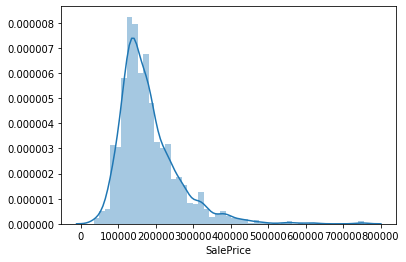

In [5]:
#histogram
# so it shows that most saleprices are around 50,000 to 250,000 .
# but  histogram has long tails (positively skewed) so some properties with really high sale price compared to avg sale price

print(df["SalePrice"].describe())
sns.distplot(df["SalePrice"])      # for histogram


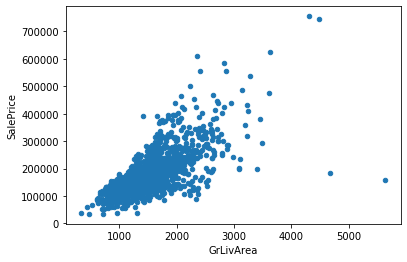

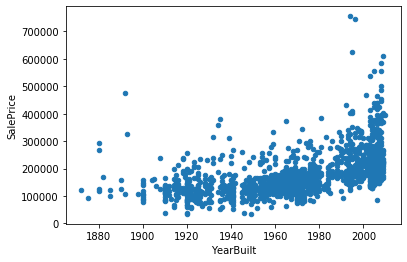

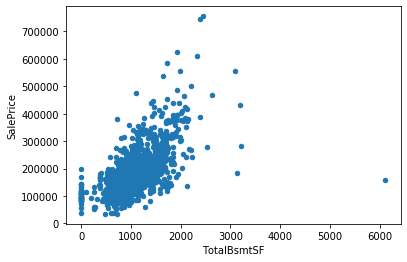

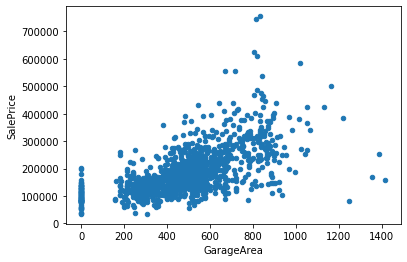

In [6]:
# Drawing Scatter plot of numerical (non categorical) values with high expectations: 
# GrLivArea , YearBuilt , TotalBsmtSF , GarageArea

Scatter_plot("GrLivArea")  # strongly linear 
Scatter_plot("YearBuilt")  # kind of obvious, as year increase, prices increase
Scatter_plot("TotalBsmtSF") #not strongly linear for small basement area but then after that its linear
Scatter_plot("GarageArea")  #weakly 


In [7]:
# for GrLivArea the right most 2 points are jsut outliers and not following the trend.
# The 3rd last and 4th last are outliers but following the trend. so deleting just the ones which are not follwoing the trend
df.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [8]:
# for TotalBsmtSF the right most value is an outlier
df.sort_values(by = 'TotalBsmtSF', ascending = False)[:1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [9]:
# GrLivArea outlier data deleting
df = df.drop(df[df['Id']==1299].index) #for TotalBsmtSF outlier data deleting
df = df.drop(df[df['Id']==524].index)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<Figure size 576x432 with 0 Axes>

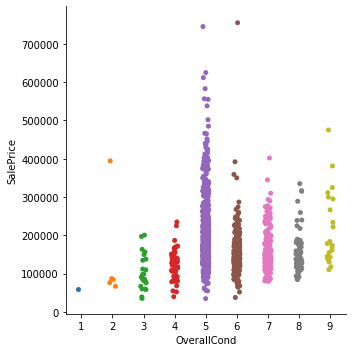

<Figure size 576x432 with 0 Axes>

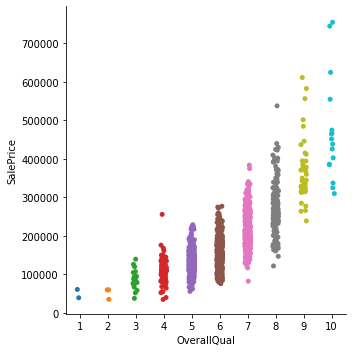

<Figure size 576x432 with 0 Axes>

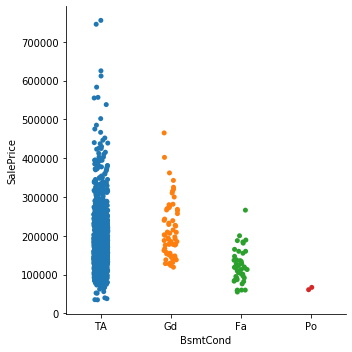

<Figure size 576x432 with 0 Axes>

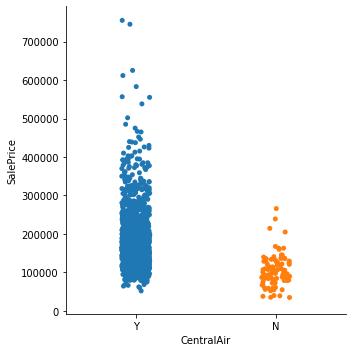

<Figure size 576x432 with 0 Axes>

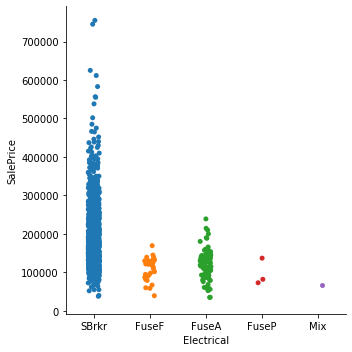

<Figure size 576x432 with 0 Axes>

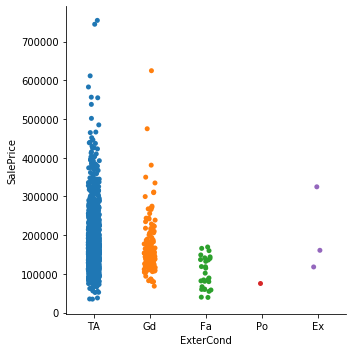

<Figure size 576x432 with 0 Axes>

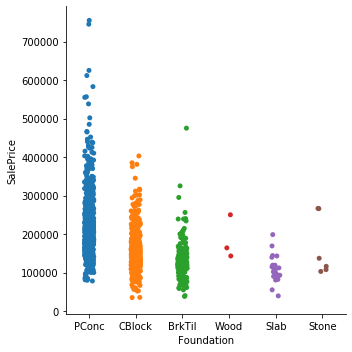

<Figure size 576x432 with 0 Axes>

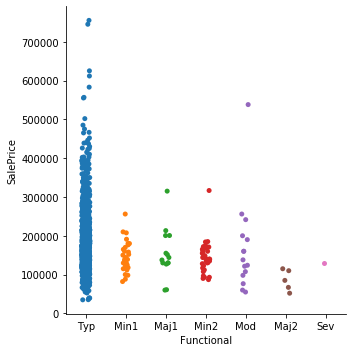

<Figure size 576x432 with 0 Axes>

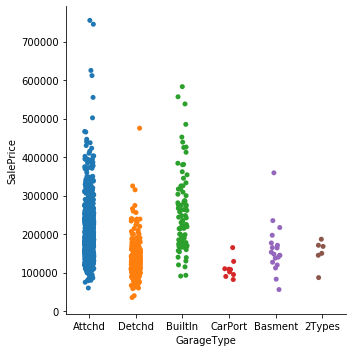

<Figure size 576x432 with 0 Axes>

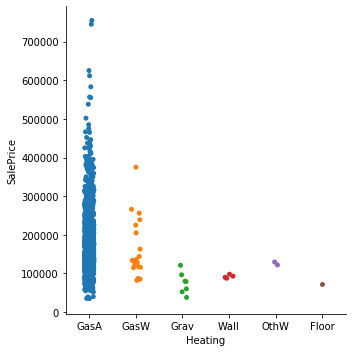

<Figure size 576x432 with 0 Axes>

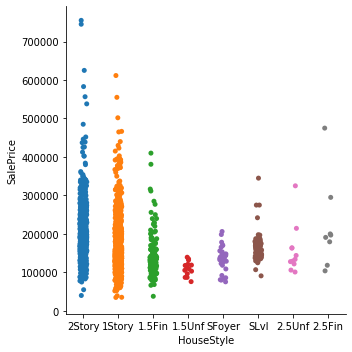

<Figure size 576x432 with 0 Axes>

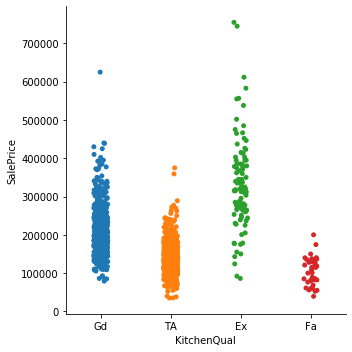

<Figure size 576x432 with 0 Axes>

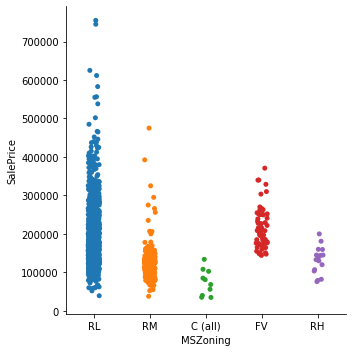

In [10]:
# using Cat plot for categorical High Expectation variables : "OverallCond","OverallQual","BsmtCond","CentralAir",
# "Electrical","ExterCond","Foundation","GarageType","Heating","KitchenQual","MSZoning","Neighborhood"

Cat_plot("OverallCond")
Cat_plot("OverallQual")
Cat_plot("BsmtCond")
Cat_plot("CentralAir")
Cat_plot("Electrical")
Cat_plot("ExterCond")
Cat_plot("Foundation")
Cat_plot("Functional")
Cat_plot("GarageType")
Cat_plot("Heating")
Cat_plot("HouseStyle")
Cat_plot("KitchenQual")
Cat_plot("MSZoning")



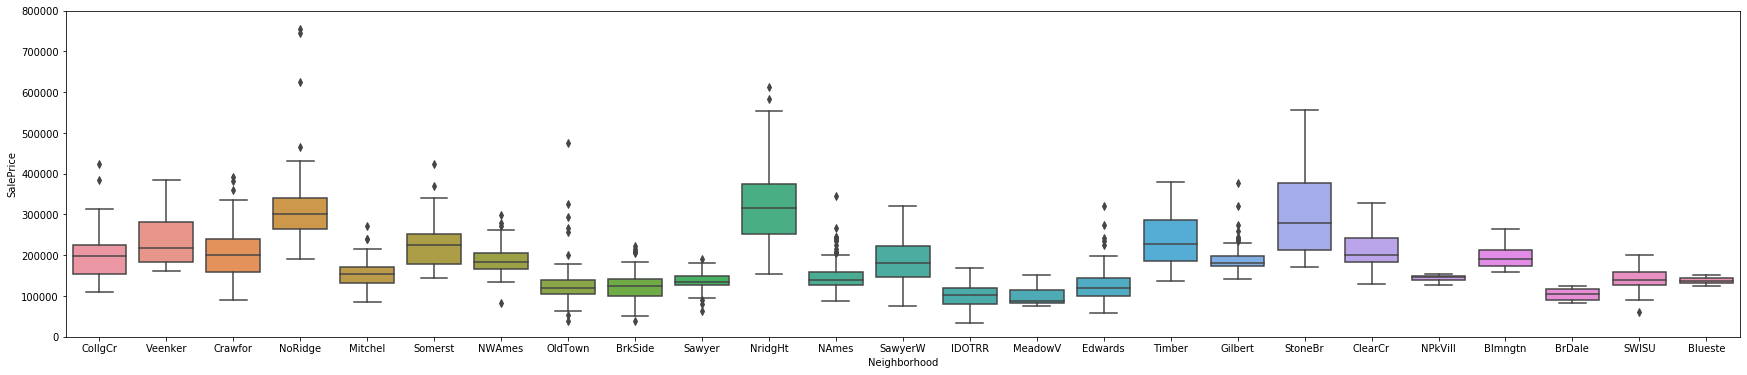

In [11]:
# plotting Neighborhood catplot seperately because it has many categories and need diff figsize
var = 'Neighborhood'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

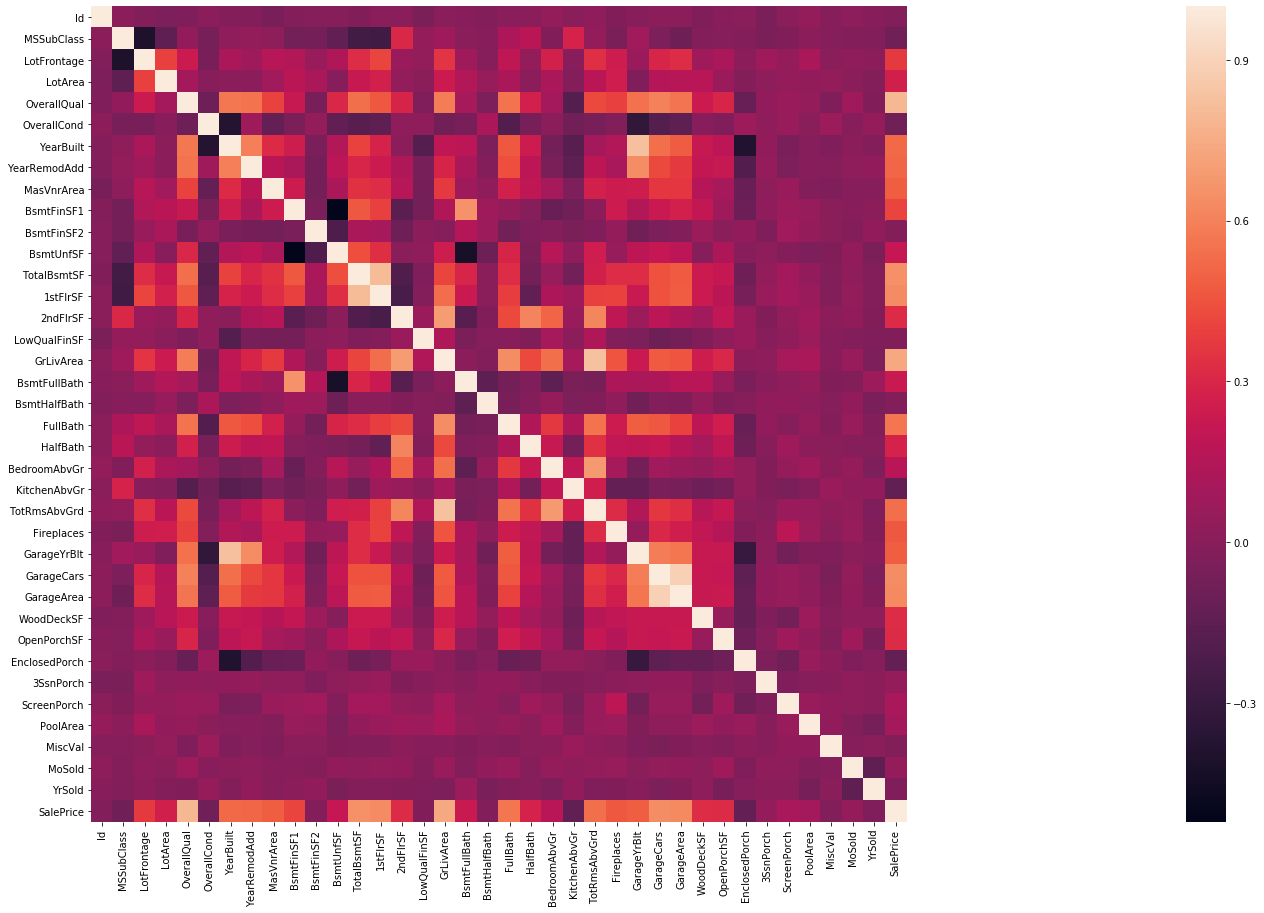

In [12]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(100, 15))
sns.heatmap(corrmat, square=True);

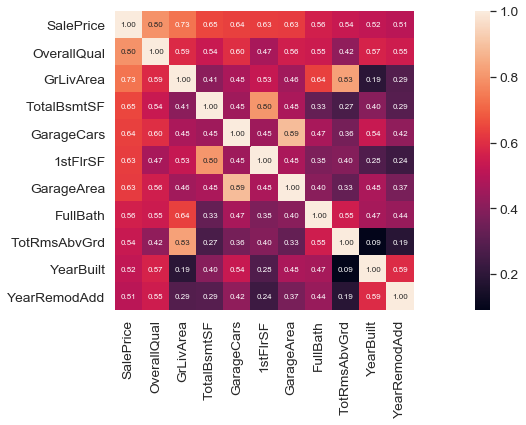

In [13]:
#Finding top 10 features corelated to SalePrice
HeatmapWithCorrelationValues(df=df,targetVariable="SalePrice", numberOfColumns=11, largestCorrelation=True) #11 because i want first 10 except sale price

### Handling Null data

In [14]:

NumberOfColumnsWithNullvalues , missingData = getNullStats(df)

print(NumberOfColumnsWithNullvalues)
missingData

19


,Total Null Values,Null Percentage
PoolQC,1452,99.588477
MiscFeature,1404,96.296296
Alley,1367,93.758573
Fence,1177,80.727023
FireplaceQu,690,47.325103
LotFrontage,259,17.764060
GarageCond,81,5.555556
GarageType,81,5.555556
GarageYrBlt,81,5.555556
GarageFinish,81,5.555556



So 19 columns have null values. 5 of them have very high percentage of null values while 6th has moderate and then others have to investigated.
so use to function made above HeatmapWithCorrelationValues for lowest correaltion values.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: Runt

<Figure size 576x432 with 0 Axes>

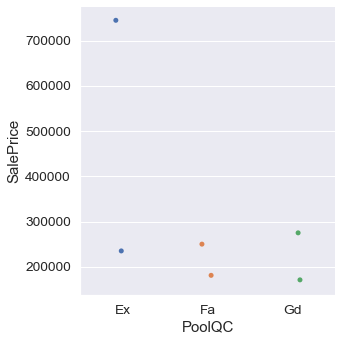

<Figure size 576x432 with 0 Axes>

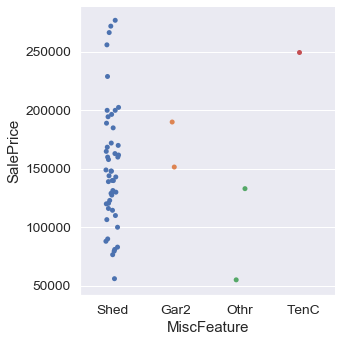

<Figure size 576x432 with 0 Axes>

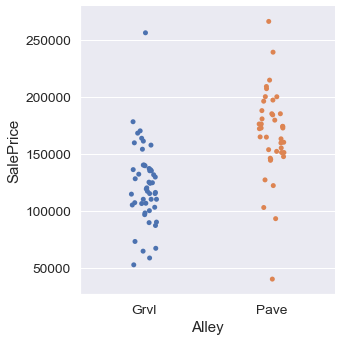

<Figure size 576x432 with 0 Axes>

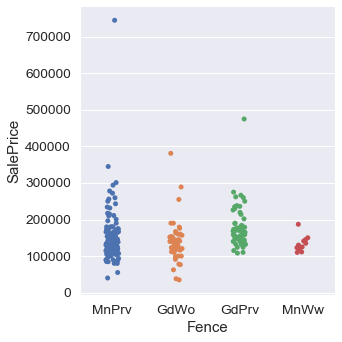

<Figure size 576x432 with 0 Axes>

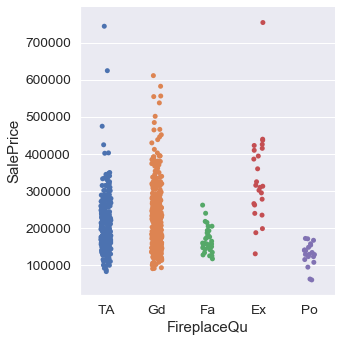

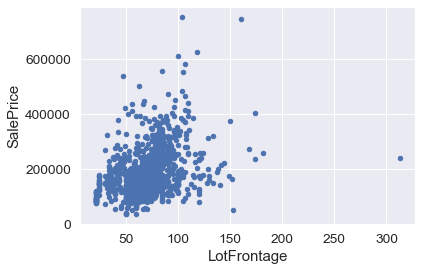

<Figure size 576x432 with 0 Axes>

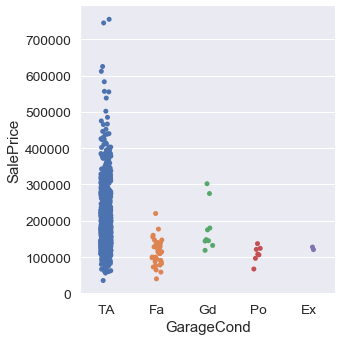

<Figure size 576x432 with 0 Axes>

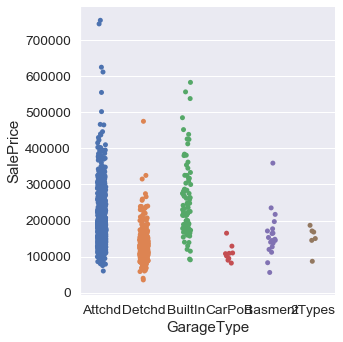

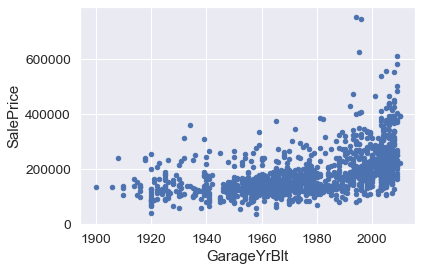

<Figure size 576x432 with 0 Axes>

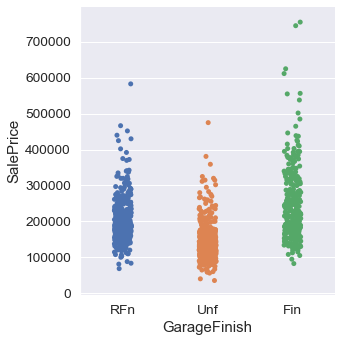

<Figure size 576x432 with 0 Axes>

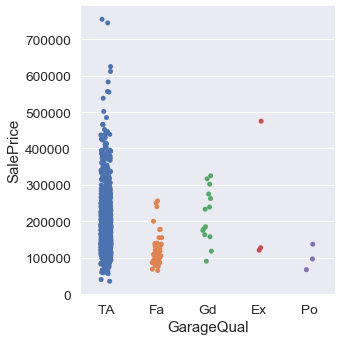

<Figure size 576x432 with 0 Axes>

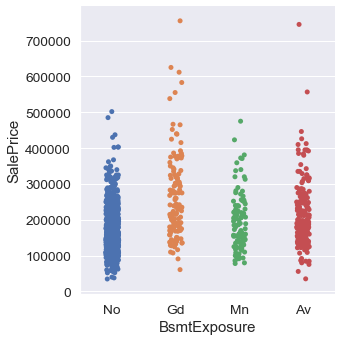

<Figure size 576x432 with 0 Axes>

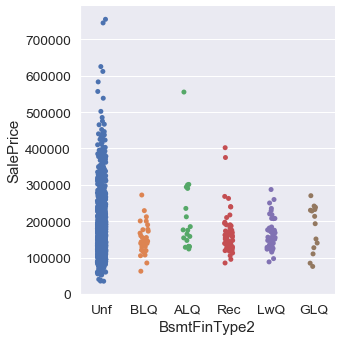

<Figure size 576x432 with 0 Axes>

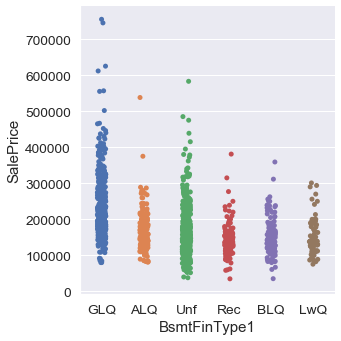

<Figure size 576x432 with 0 Axes>

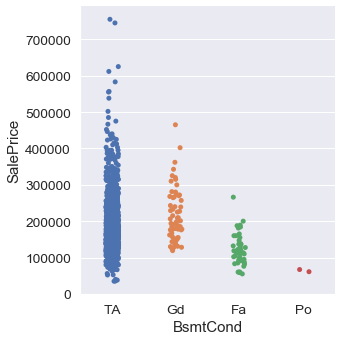

<Figure size 576x432 with 0 Axes>

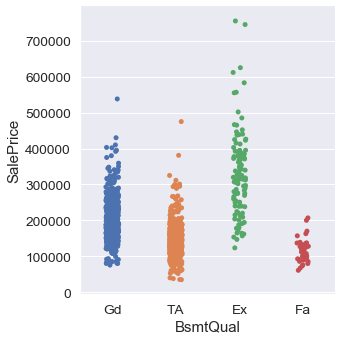

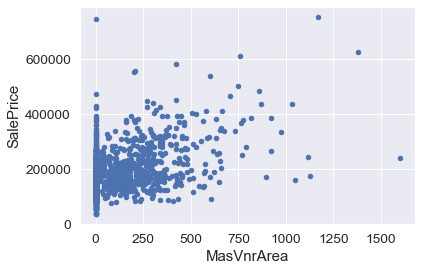

<Figure size 576x432 with 0 Axes>

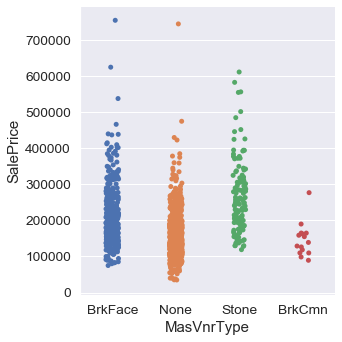

<Figure size 576x432 with 0 Axes>

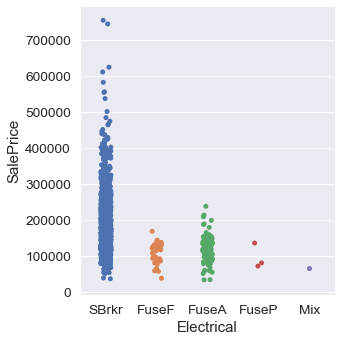

In [15]:
#scatter and cat plots for columns in table variable 
# plots are sorted from the most null values features to least null values features
for i in missingData.index:
    if df[i].dtype==np.object:
        Cat_plot(i)
    else:
        Scatter_plot(i)

# None of the features have good plot (except eletric or some garage variables). we can just drop them

In [16]:
#To handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. 
# In 'Electrical' we'll just delete the observation with missing data.

df = df.drop( (missingData[missingData['Total Null Values']>1]) .index, 1)   # >1 because we dont want to delete Electirc feature completely
df = df.drop( df.loc[df['Electrical'].isnull()].index )
df.isnull().sum().max()  #checking if any more null values are there in the data

0

# TRANSFORMING SKEWED DATA:

###### Good article for transforming skewed data (same dataset):
https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0



Original  skewness :  1.8803628919012763


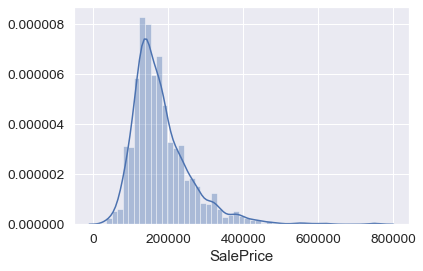

In [17]:
print("Original  skewness : ",df["SalePrice"].skew())

# make histogram to check if dist is normal
sns.distplot(df["SalePrice"])      #positively skewed



((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74240.99917988207, 180942.13864104328, 0.9320520365889884))

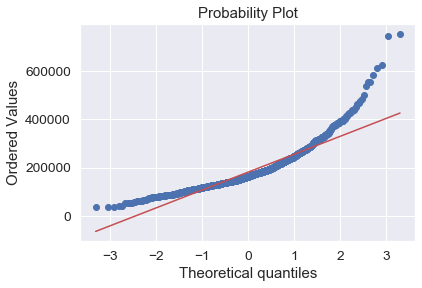

In [18]:
#probability plot.this plot shows how much the data follows a distribtion. 
# default distribution for this function is normal so straighter the line more normal it is
stats.probplot(df['SalePrice'], plot=plt)


In [19]:
# code snippet from medium link mentioned above. This skew function finds the skewness of all continious features.
# (even if you give it the whole dataset it will only return skewness of cont features). 
# .skew calculates Fisher–Pearson standardized moment coefficient.

# The null hypothesis while doing this is that data is normal. 
# so p value should be above 0.5 atleast. less than 0.5 means data has skewness and hence not normal

# If skewness is less than -1 or greater than 1, the distribution is highly skewed. 
# If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. 
# If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

numberOfFeatures = df.dtypes[df.dtypes!='object'].index
skewedFeatures = df[numberOfFeatures].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skewness' : skewedFeatures}) 
skewnessTransposed = skewness.T
skewnessTransposed
#simple skewness variable would just take up vertical space 

,MiscVal,PoolArea,LotArea,3SsnPorch,LowQualFinSF,KitchenAbvGr,BsmtFinSF2,ScreenPorch,BsmtHalfBath,EnclosedPorch,OpenPorchSF,SalePrice,WoodDeckSF,MSSubClass,GrLivArea,BsmtUnfSF,1stFlrSF,2ndFlrSF,BsmtFinSF1,OverallCond,HalfBath,TotRmsAbvGrd,Fireplaces,BsmtFullBath,TotalBsmtSF,MoSold,BedroomAbvGr,OverallQual,GarageArea,YrSold,FullBath,Id,GarageCars,YearRemodAdd,YearBuilt
Skewness,24.451726,15.943422,12.56954,10.293487,9.00176,4.483125,4.250256,4.117285,4.098469,3.085809,2.339021,1.880363,1.545377,1.407975,1.010236,0.919946,0.887059,0.814243,0.763964,0.690018,0.682135,0.660943,0.631064,0.589254,0.512456,0.214483,0.212593,0.199555,0.131046,0.095672,0.032573,0.000823,-0.34167,-0.5009,-0.611599


#### So we have to remove the skewness of the data.
#### and why do we care if the data is skewed? Because if the response variable is skewed, then the model will be trained on a much larger number of moderately priced homes, and will be less likely to successfully predict the price for the most expensive houses.

#### There are different types of transformations to remove skewness: square-root, reciprocal, log etc

AxesSubplot(0.125,0.125;0.775x0.755)


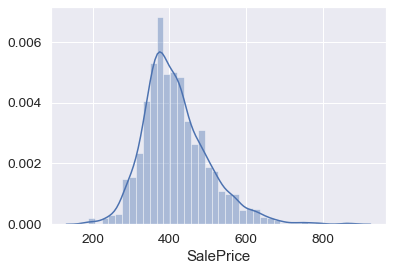

In [20]:
# For salePrice lets try all transformations.

#Square Root transformation
squareRootTransformed = df["SalePrice"]**0.5
print(sns.distplot(squareRootTransformed))

# result : stil looks a little skewed

AxesSubplot(0.125,0.125;0.775x0.755)


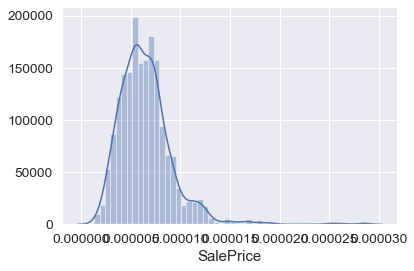

In [21]:
# Reciprocal transformation :
reciprocalTransformed = 1/df["SalePrice"]
print(sns.distplot(reciprocalTransformed))

#result : still skewed a little

AxesSubplot(0.125,0.125;0.775x0.755)


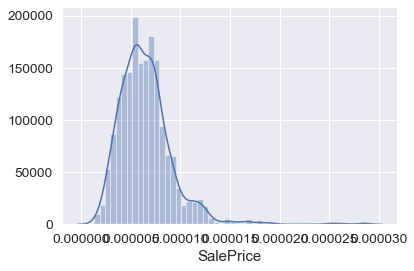

In [22]:
# Log transformation :
logTransformed = np.log(df["SalePrice"])
print(sns.distplot(reciprocalTransformed))

#result : still there is some but the best one among others

old skewness :  1.8803628919012763
New skewness :  0.12155100983632659


((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3986736383757874, 12.024005414589174, 0.9954027633642684))

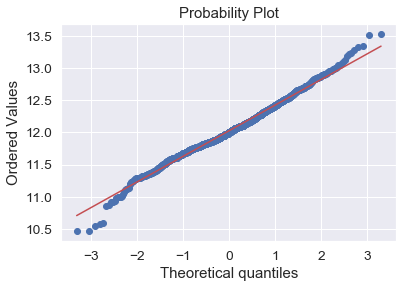

In [23]:
# so since log transformation is best then lets replace salePrice data in dataset with the transformed data
print("old skewness : ",df["SalePrice"].skew())
df["SalePrice"] = np.log(df["SalePrice"])
print("New skewness : ",df["SalePrice"].skew())
stats.probplot(df['SalePrice'], plot=plt)


# If skewness is less than -1 or greater than 1, the distribution is highly skewed. 
# If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. 
# If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

#as we can see , the skewness is much better than before

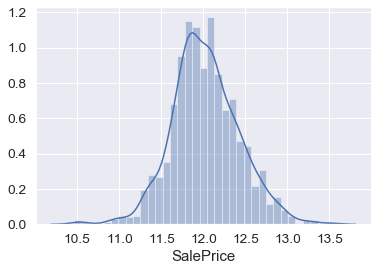

In [24]:

# make histogram to check if dist is normal
sns.distplot(df["SalePrice"])      #positively skewed

## Checking homoscedasticity 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


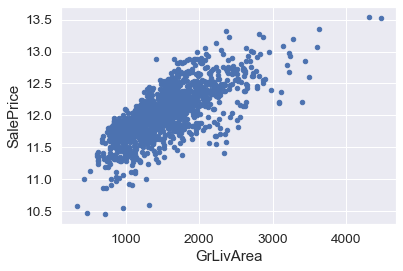

In [25]:
#best way to check is by plotting graph, we are making scatter plot here. variance across the regression line shoul be simillar
Scatter_plot("GrLivArea")

# this shape is not good for homoscedasticity
#so we have to normalize the GrLivArea too now

#### Normalizing GrLivArea

Original  skewness :  1.010236026657094


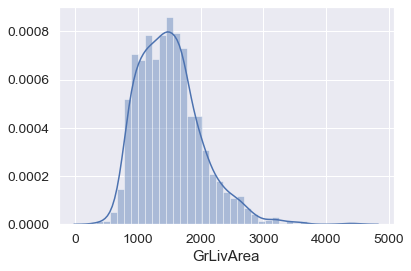

In [26]:
print("Original  skewness : ",df["GrLivArea"].skew())

# make histogram to check if dist is normal
sns.distplot(df["GrLivArea"])      #positively skewed


((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([ 334,  438,  480, ..., 3627, 4316, 4476], dtype=int64)),
 (495.8648796248946, 1510.5456417295816, 0.9744141158065238))

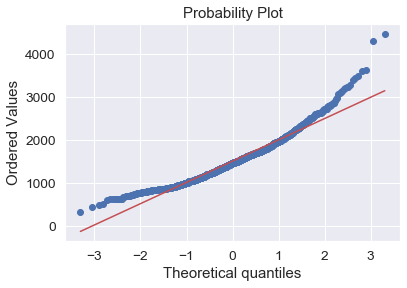

In [27]:
#probability plot.this plot shows how much the data follows a distribtion. 
# default distribution for this function is normal so straighter the line more normal it is
stats.probplot(df['GrLivArea'], plot=plt)
#so the data is skewed and we have to normalize it

old skewness :  1.010236026657094
New skewness :  -0.07195758277146162


((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([5.81114099, 6.08221891, 6.1737861 , ..., 8.19616114, 8.37008433,
         8.40648507])),
 (0.3304288478350053, 7.266041506402603, 0.9981242998055863))

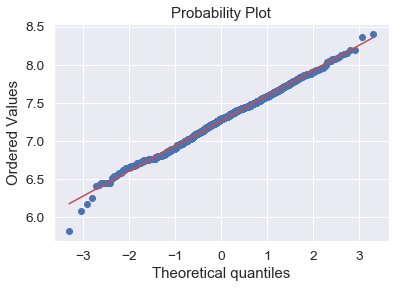

In [28]:
#lets apply log transformation
print("old skewness : ",df["GrLivArea"].skew())
df["GrLivArea"] = np.log(df["GrLivArea"])
print("New skewness : ",df["GrLivArea"].skew())
stats.probplot(df['GrLivArea'], plot=plt)


# If skewness is less than -1 or greater than 1, the distribution is highly skewed. 
# If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. 
# If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

#as we can see , the skewness is much better than before

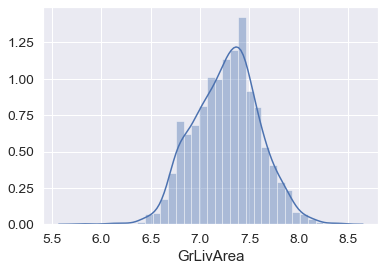

In [29]:
#histogram
sns.distplot(df["GrLivArea"])   # much better symmetric

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


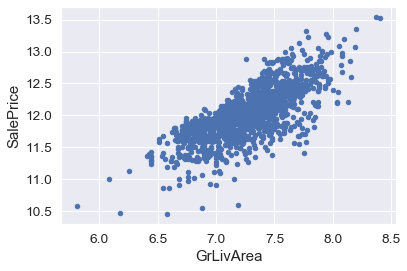

In [31]:
#now check the homoscedasticity
Scatter_plot("GrLivArea") #better homoscedasticity


#### checking homoscedasticity for TotalBsmtSF

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


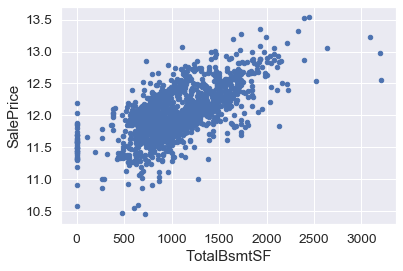

In [32]:
Scatter_plot("TotalBsmtSF")
# So its not that much homoscedasticity but because TotalBsmtSF has values zero so it has to be dealt differently.
# its done in the kaggle kernal https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/data

##### How to Convert Categorical variables so they can be used for regression??
https://stats.idre.ucla.edu/spss/faq/coding-systems-for-categorical-variables-in-regression-analysis-2/

In [33]:
#one way is to use pandas get_dummies(). it returns dataframe with one hot encoded data (converts categorical data to one hot encoding)
# df=pd.get_dummies(df)
